<a href="https://colab.research.google.com/github/seobando/TradingBot/blob/main/3_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/1 Formal Training/2 Msc. Ciencia de los datos/Semestre IV/Trader

/content/drive/MyDrive/1 Formal Training/2 Msc. Ciencia de los datos/Semestre IV/Trader


In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/data_daily_BTC-USD.csv").drop("Unnamed: 0", axis=1)
df["Date"] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df.describe()

,Open,High,Low,Close,Volume,MA_short,MA_long,EMA_short,EMA_long,EMA_short_MACD,EMA_long_MACD,MACD,MACD_signal,MACD_hist,BIAS_short,BIAS_long,VR,OBV
count,1518.000000,1518.000000,1518.000000,1518.000000,1.518000e+03,1469.000000,1319.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1510.000000,1510.000000,1469.000000,1319.000000,1469.000000,1.518000e+03
mean,18215.372560,18712.187936,17666.803321,18238.024696,2.520617e+10,17857.847343,16224.513284,17531.909807,15454.177407,18091.415367,17894.589744,196.825622,201.597648,-3.207510,2.841476,17.105734,1.136176,7.955884e+11
std,17531.410566,18013.538524,16976.481187,17538.465412,2.099226e+10,17055.749827,14611.554604,16642.015049,13684.931756,17371.798268,17132.286387,1217.887819,1158.445840,338.285007,17.481565,45.641311,0.320300,7.584988e+11
min,3236.274658,3275.377930,3191.303467,3236.761719,2.923670e+09,3661.442896,4454.763333,3706.480608,4675.041182,3478.766893,3559.321947,-5053.274080,-4438.999056,-1694.518206,-47.481409,-48.851346,0.493525,-1.907428e+10
25%,7187.550171,7324.363403,6948.230102,7189.858277,7.736592e+09,7167.290254,7371.145714,7265.606009,7858.667897,7179.360187,7214.463016,-237.306876,-227.122449,-92.358832,-8.221147,-15.817575,0.907939,1.133072e+11
50%,9523.907226,9700.821778,9316.446289,9525.557129,2.124644e+10,9403.645469,8910.135430,9220.620918,8708.275411,9435.865237,9415.683918,26.800214,29.415468,5.551801,0.332706,6.421503,1.068127,5.117535e+11
75%,23213.368652,23965.843262,22690.849609,23418.307617,3.578419e+10,20932.040508,18584.879712,18269.122171,13585.479245,21433.530264,19975.558804,460.985065,461.024082,100.784058,15.104363,35.462524,1.330748,1.592037e+12
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,60801.771016,47998.925938,59149.818512,50102.427218,64182.504548,62406.255181,5273.808690,4517.102703,1305.313389,75.800984,183.435289,2.525428,2.612395e+12


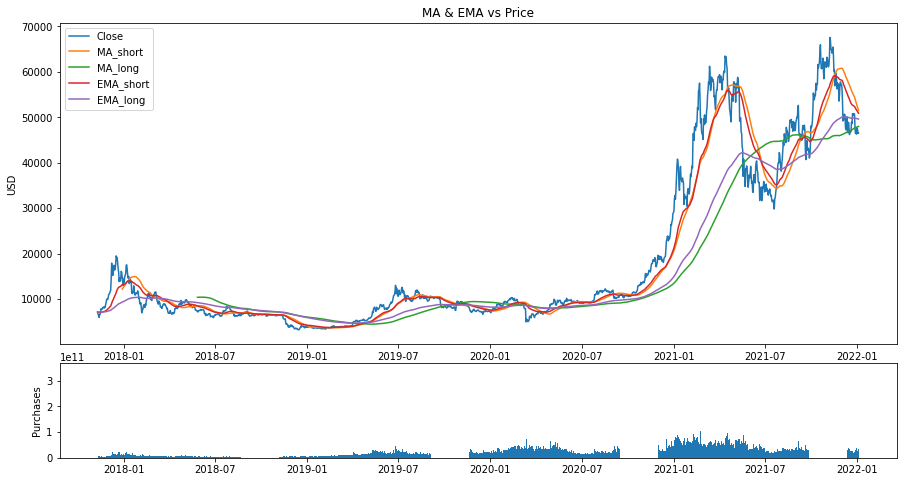

In [ ]:
## MOVING AVERANGE(MA, EMA) ANALYSIS
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], label="Price")
top.plot(df.index, df["MA_short"], label="MA_short")
top.plot(df.index, df["MA_long"], label="MA_long")
top.plot(df.index, df["EMA_short"], label="EMA_short")
top.plot(df.index, df["EMA_long"],label="EMA_long")
plt.legend(labels=["Close","MA_short","MA_long","EMA_short","EMA_long"], loc='upper left', bbox_transform=top.transAxes)
plt.title('MA & EMA vs Price')
plt.ylabel('USD')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df.index, df['Volume'])
plt.ylabel('Purchases')

plt.gcf().set_size_inches(15,8)

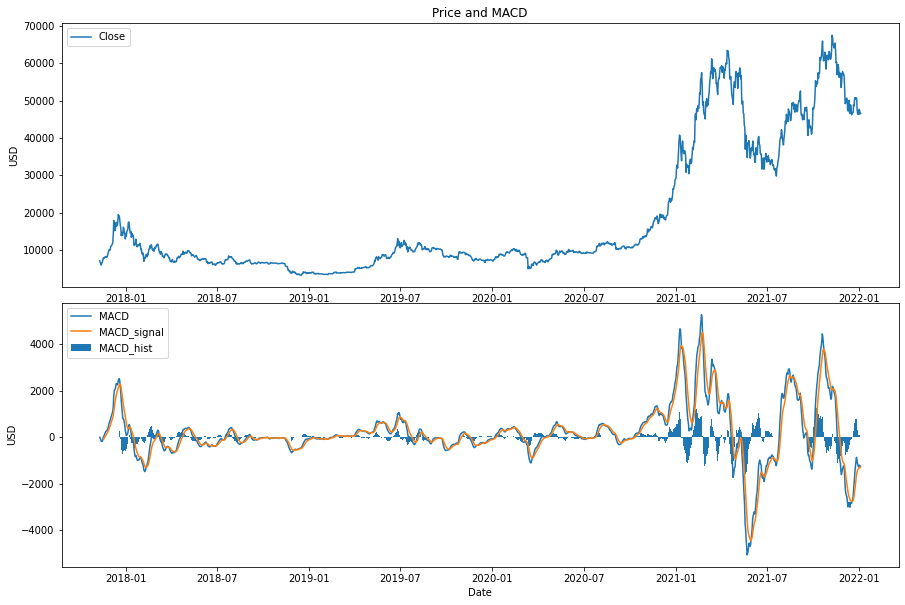

In [ ]:
## MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD) ANALYSIS
top = plt.subplot2grid((6,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"])
top.legend(labels=["Close","MA_short","MA_short","EMA_short","EMA_long"], loc='upper left', bbox_transform=top.transAxes)
plt.title('Price and MACD')
plt.ylabel('USD')

bottom = plt.subplot2grid((6,4), (3,0), rowspan=3, colspan=4)
bottom.plot(df.index, df["MACD"])
bottom.plot(df.index, df["MACD_signal"])
bottom.bar(df.index, df['MACD_hist'])
bottom.legend(labels=["MACD","MACD_signal","MACD_hist"], loc='upper left', bbox_transform=bottom.transAxes)
plt.ylabel('USD')
plt.xlabel('Date')

plt.gcf().set_size_inches(15,10)

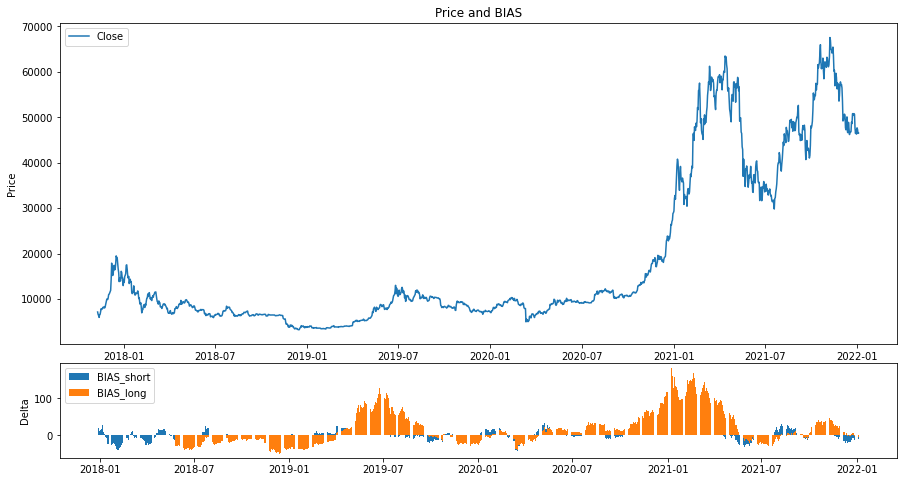

In [ ]:
## BIAS ANALYSIS
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], label="Price")
plt.legend(labels=["Close"], loc='upper left', bbox_transform=top.transAxes)
plt.title('Price and BIAS')
plt.ylabel('Price')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df.index, df["BIAS_short"], label="BIAS_short")
bottom.bar(df.index, df["BIAS_long"], label="BIAS_long")
plt.legend(labels=["BIAS_short","BIAS_long"], loc='upper left', bbox_transform=top.transAxes)
plt.ylabel('Delta')

plt.gcf().set_size_inches(15,8)

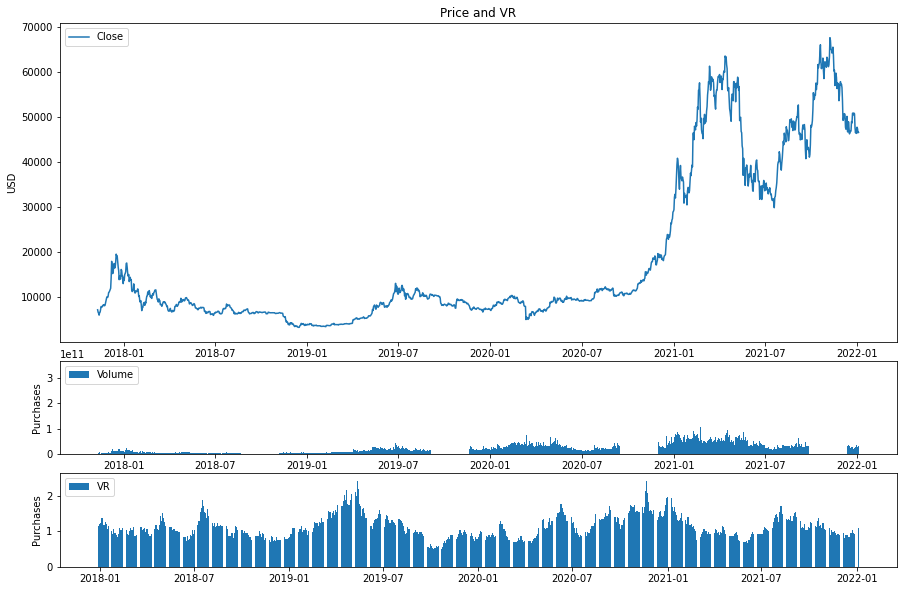

In [ ]:
## VOLATITLY VOLUME RATIO (VR) ANALYSIS
top = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], label="Price")
plt.legend(labels=["Close"], loc='upper left', bbox_transform=top.transAxes)
plt.title('Price and VR')
plt.ylabel('USD')

middle = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
middle.bar(df.index, df['Volume'])
plt.legend(labels=["Volume"], loc='upper left', bbox_transform=top.transAxes)
plt.ylabel('Purchases')

bottom = plt.subplot2grid((5,4), (4,0), rowspan=1, colspan=4)
bottom.bar(df.index, df['VR'])
plt.legend(labels=["VR"], loc='upper left', bbox_transform=top.transAxes)
plt.ylabel('Purchases')

plt.gcf().set_size_inches(15,10)

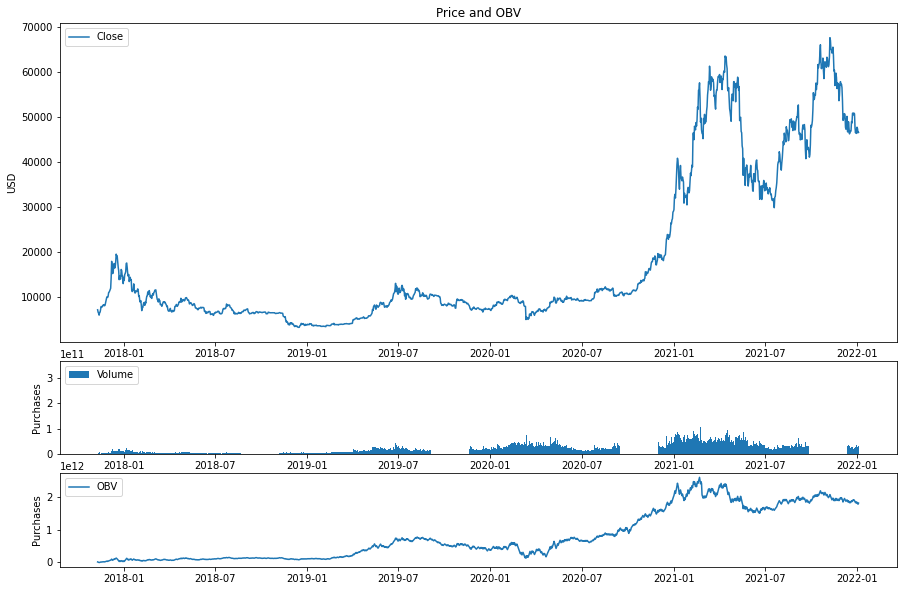

In [ ]:
## ON BALANCE VOLUME (OBV) ANALYSIS
top = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], label="Price")
plt.legend(labels=["Close"], loc='upper left', bbox_transform=top.transAxes)
plt.title('Price and OBV')
plt.ylabel('USD')

middle = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
middle.bar(df.index, df['Volume'])
plt.legend(labels=["Volume"], loc='upper left', bbox_transform=top.transAxes)
plt.ylabel('Purchases')

bottom = plt.subplot2grid((5,4), (4,0), rowspan=1, colspan=4)
bottom.plot(df.index, df['OBV'])
plt.legend(labels=["OBV"], loc='upper left', bbox_transform=top.transAxes)
plt.ylabel('Purchases')

plt.gcf().set_size_inches(15,10)

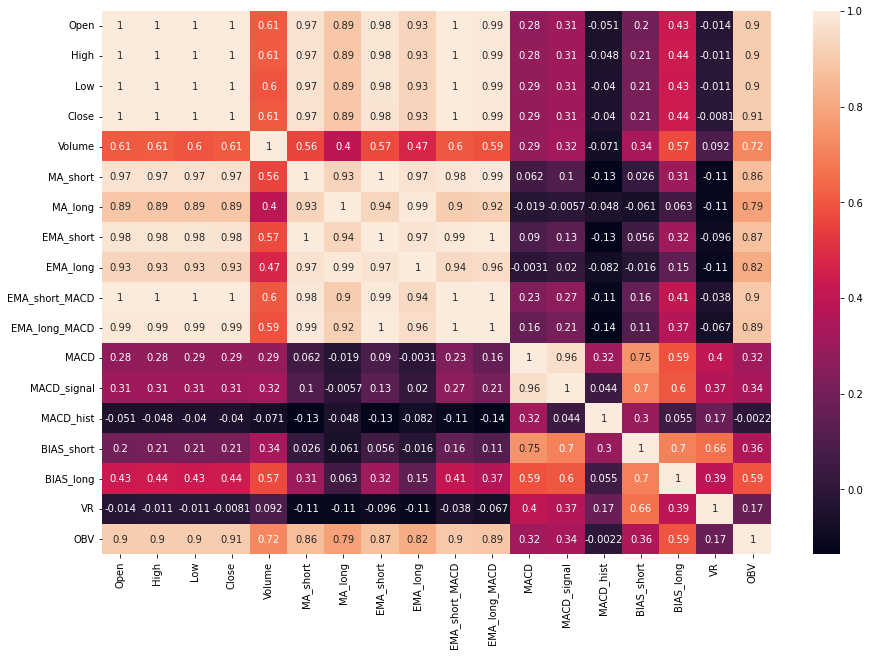

In [ ]:
## CORRELATIONS ANALYSIS
variables =  ['Open', 'High','Low', 'Close', 'Volume', 'MA_short', 'MA_long', 'EMA_short','EMA_long','EMA_short_MACD','EMA_long_MACD', 'MACD','MACD_signal','MACD_hist', 'BIAS_short', 'BIAS_long', 'VR', 'OBV']
df = df[variables]
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [ ]:
price_correlations = df[df.columns[1:]].corr()['Close'].reset_index().sort_values(by='Close')
display(price_correlations)

,index,Close
12,MACD_hist,-0.039758
15,VR,-0.008060
13,BIAS_short,0.212559
10,MACD,0.286767
11,MACD_signal,0.313341
14,BIAS_long,0.436055
3,Volume,0.605403
5,MA_long,0.891825
16,OBV,0.905626
7,EMA_long,0.931456
